In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.api import OLS,add_constant
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("tips (data for regression problem).csv")

# Display basic information about the dataset
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


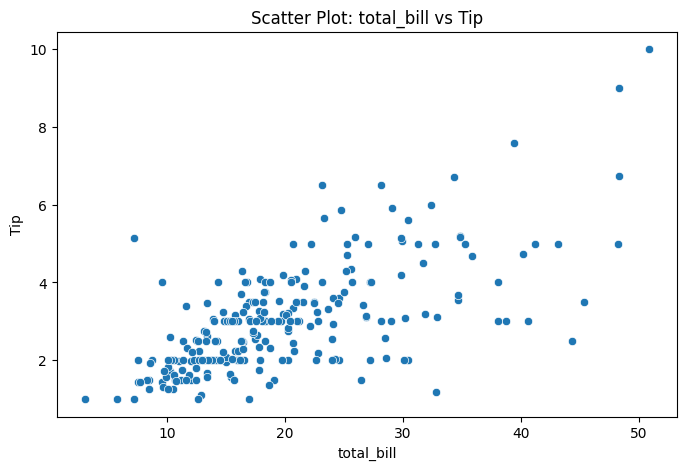

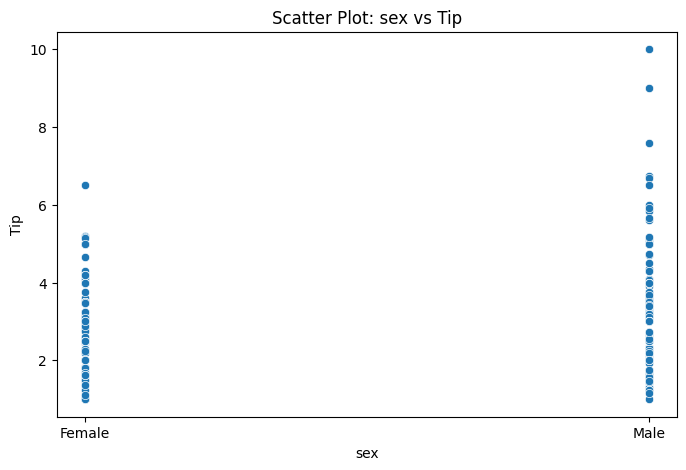

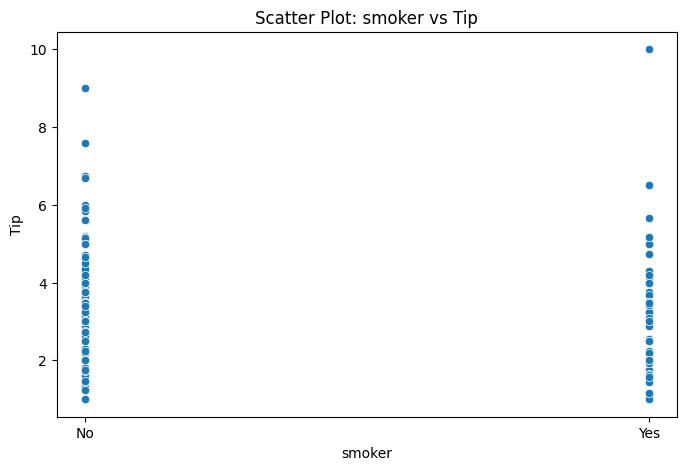

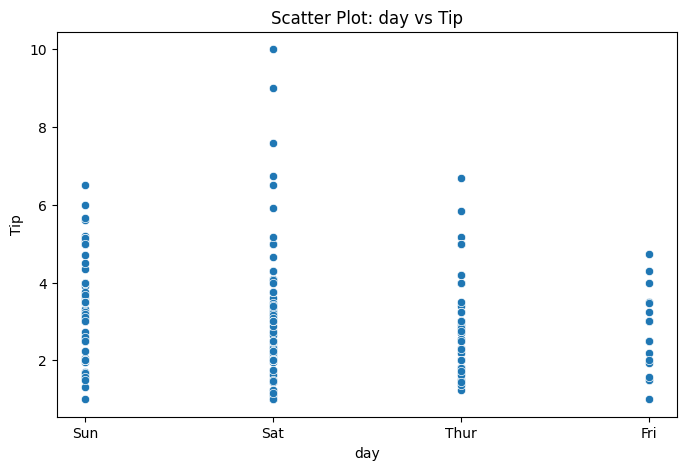

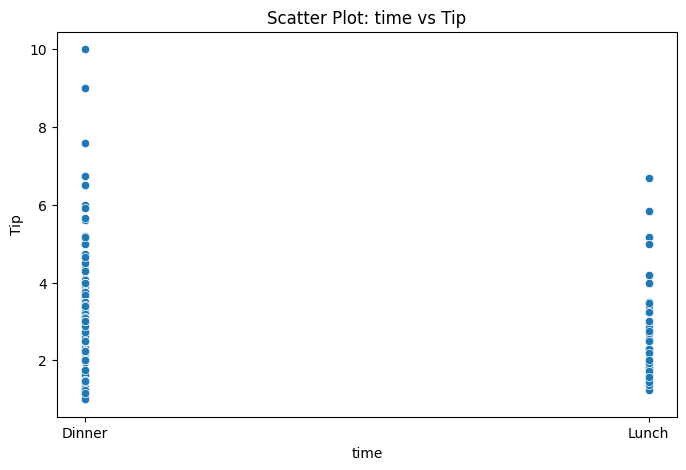

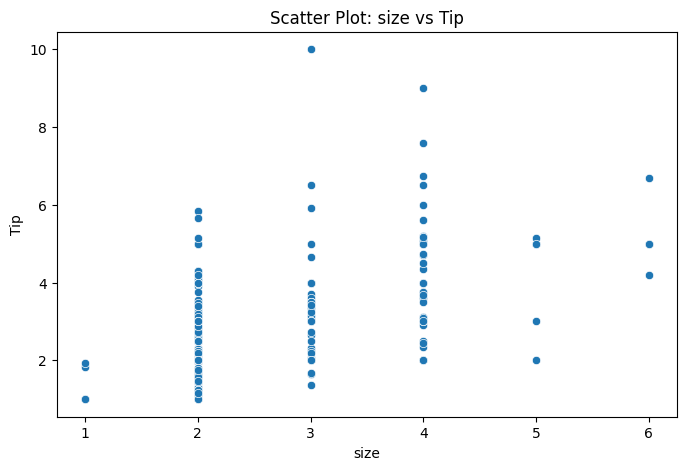

In [25]:
# Scatter plots for each feature against 'tip'
for column in data.columns:
    if column != 'tip':  # assuming 'tip' is the target variable
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=data[column], y=data['tip'])
        plt.title(f'Scatter Plot: {column} vs Tip')
        plt.xlabel(column)
        plt.ylabel('Tip')
        plt.show()


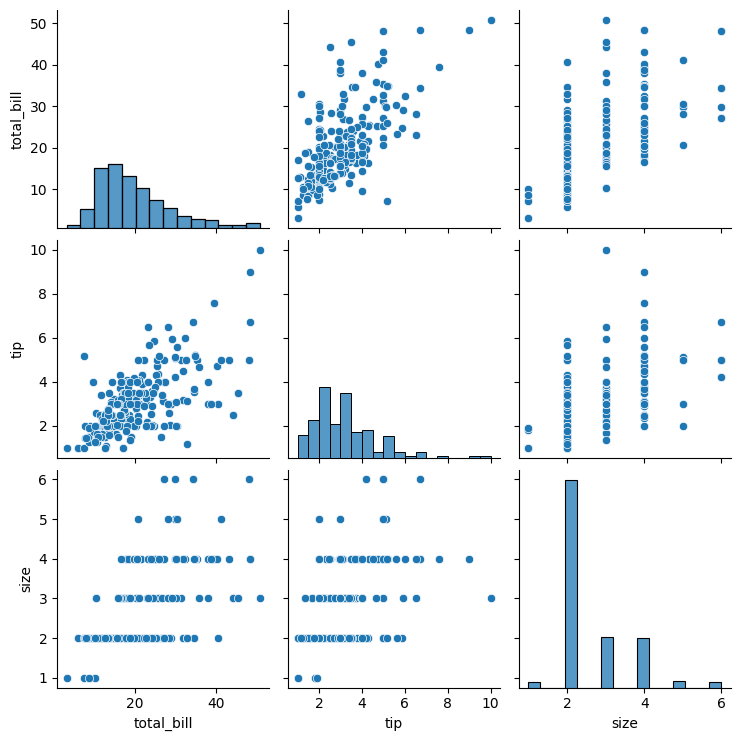

In [26]:
# Pair plot to visualize all feature relationships
sns.pairplot(data)
plt.show()


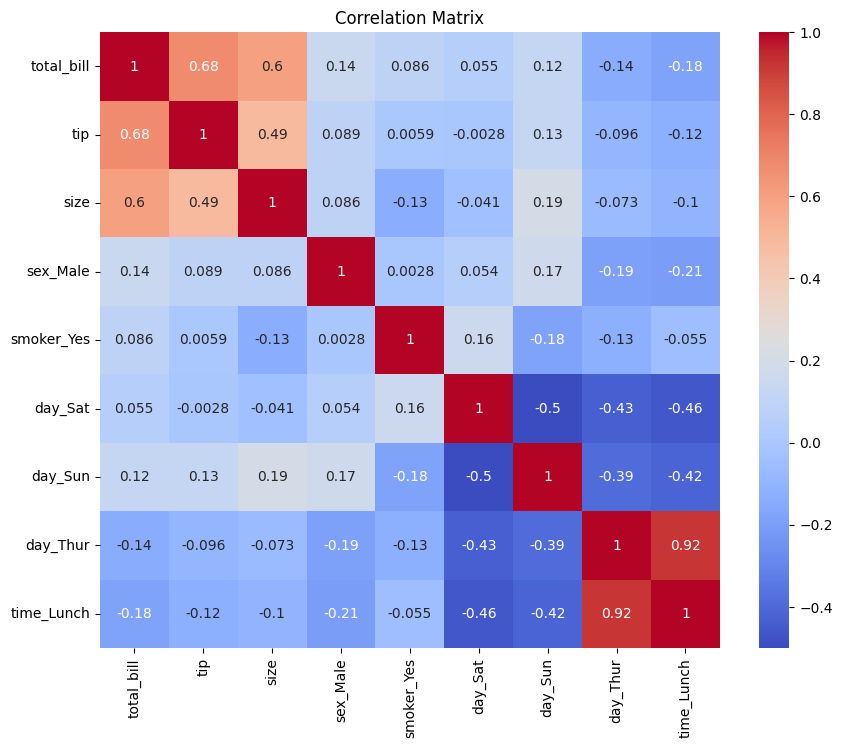

In [10]:
# Correlation matrix for  observing  relationships
data_numeric = pd.get_dummies(data, columns=['sex', 'smoker', 'day', 'time'], drop_first=True) # Convert categorical columns to numerical using one-hot encoding
correlation_matrix = data_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



In [31]:
# Rainbow Test for Linearity
# Adding constant to predictors for OLS regression
y = data['tip']
X = data[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['sex', 'smoker', 'day', 'time'], drop_first=True, dtype=float) # Explicitly set dtype to float

X_const = add_constant(X)
model = OLS(y, X_const).fit()
rainbow_statistic, rainbow_p_value = linear_rainbow(model)
print(f"Rainbow test statistic: {rainbow_statistic}, p-value: {rainbow_p_value}")


Rainbow test statistic: 1.197054547994589, p-value: 0.1658838305924099


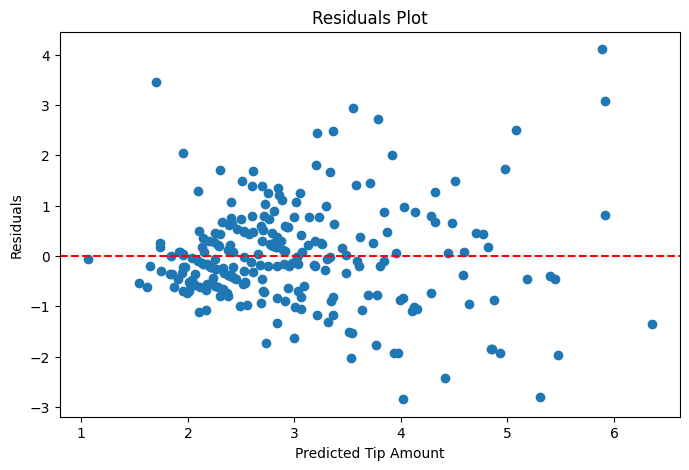

In [32]:
# Residuals Plot
predictions = model.predict(X_const)
residuals = y - predictions
plt.figure(figsize=(8, 5))
plt.scatter(predictions, residuals)
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals Plot')
plt.xlabel('Predicted Tip Amount')
plt.ylabel('Residuals')
plt.show()


In [33]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [34]:
# Dictionary to store models and results
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100),
    "Support Vector Regressor": SVR(kernel='rbf'),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor(n_neighbors=5)
}

results = {}

# Training and evaluating each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {"MSE": mse, "R2": r2}
    print(f"{model_name} - MSE: {mse:.2f}, R2: {r2:.2f}")


Linear Regression - MSE: 0.93, R2: 0.29
Ridge Regression - MSE: 0.93, R2: 0.30
Lasso Regression - MSE: 0.78, R2: 0.41
Decision Tree Regressor - MSE: 1.25, R2: 0.05
Random Forest Regressor - MSE: 0.93, R2: 0.29
Support Vector Regressor - MSE: 0.74, R2: 0.44
K-Nearest Neighbors Regressor - MSE: 1.01, R2: 0.23


In [35]:
# Displaying results for comparison
results_df = pd.DataFrame(results).T
print("\nModel Comparison:\n", results_df.sort_values(by="R2", ascending=False))



Model Comparison:
                                     MSE        R2
Support Vector Regressor       0.736563  0.441231
Lasso Regression               0.780329  0.408030
Ridge Regression               0.926062  0.297474
Linear Regression              0.931832  0.293097
Random Forest Regressor        0.934142  0.291344
K-Nearest Neighbors Regressor  1.012412  0.231968
Decision Tree Regressor        1.249657  0.051990
